In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read files from FeatureCounts as pandas dataframes

In [29]:
cy1 =pd.read_csv('./c1_yeast.fc',sep='\t', skiprows=1)
cy2 =pd.read_csv('./c2_yeast.fc',sep='\t', skiprows=1)
cy3 =pd.read_csv('./c3_yeast.fc',sep='\t', skiprows=1)
cc1 =pd.read_csv('./c1_chlorella.fc',sep='\t', skiprows=1)
cc2 =pd.read_csv('./c2_chlorella.fc',sep='\t', skiprows=1)
cc3 =pd.read_csv('./c3_chlorella.fc',sep='\t', skiprows=1)

coy1 =pd.read_csv('./co1_yeast.fc',sep='\t', skiprows=1)
coy2 =pd.read_csv('./co2_yeast.fc',sep='\t', skiprows=1)
coy3 =pd.read_csv('./co3_yeast.fc',sep='\t', skiprows=1)
coc1 =pd.read_csv('./co1_chlorella.fc',sep='\t', skiprows=1)
coc2 =pd.read_csv('./co2_chlorella.fc',sep='\t', skiprows=1)
coc3 =pd.read_csv('./co3_chlorella.fc',sep='\t', skiprows=1)

cv1 =pd.read_csv('./cv1_chlorella.fc',sep='\t', skiprows=1)
cv2 =pd.read_csv('./cv2_chlorella.fc',sep='\t', skiprows=1)
cv3 =pd.read_csv('./cv3_chlorella.fc',sep='\t', skiprows=1)


# Merege readcount dfs into one df as input for DESeq comparisons

In [47]:

deseqcc_co =pd.merge(cc1, cc2)
deseqcc_co =pd.merge(deseqcc_co, cc3)
deseqcc_co =pd.merge(deseqcc_co, coc1)
deseqcc_co =pd.merge(deseqcc_co, coc2)
deseqcc_co =pd.merge(deseqcc_co, coc3)

deseq_cv_cc=pd.merge(cv1, cv2)
deseq_cv_cc =pd.merge(deseq_cv_cc, cv3)
deseq_cv_cc =pd.merge(deseq_cv_cc, cc1)
deseq_cv_cc =pd.merge(deseq_cv_cc, cc2)
deseq_cv_cc =pd.merge(deseq_cv_cc, cc3)

deseq_cv_co=pd.merge(cv1, cv2)
deseq_cv_co =pd.merge(deseq_cv_co, cv3)
deseq_cv_co =pd.merge(deseq_cv_co, coc1)
deseq_cv_co =pd.merge(deseq_cv_co, coc2)
deseq_cv_co =pd.merge(deseq_cv_co, coc3)

# Write those DFs to serve as input for DESeq

In [52]:
deseqy[['Geneid', 'c1_yeast.sam','c2_yeast.sam', 'c3_yeast.sam', 'co1_yeast.sam', 
               'co2_yeast.sam','co3_yeast.sam']].to_csv('./yeast_raw_reads.txt', sep='\t')

In [48]:
deseqcc_co[['Geneid', 'c1_chlorella.sam', 'c2_chlorella.sam', 'c3_chlorella.sam',
       'co1_chlorella.sam', 'co2_chlorella.sam', 'co3_chlorella.sam']].to_csv('./chlorella_c_vs_co_raw_reads.txt', sep='\t')

In [49]:
deseq_cv_cc[['Geneid', 'cv1_chlorella.sam', 'cv2_chlorella.sam', 'cv3_chlorella.sam',
       'c1_chlorella.sam', 'c2_chlorella.sam', 'c3_chlorella.sam']].to_csv('./chlorella_cv_vs_c_raw_reads.txt', sep='\t')

In [50]:
deseq_cv_co[['Geneid', 'cv1_chlorella.sam', 'cv2_chlorella.sam', 'cv3_chlorella.sam',
       'co1_chlorella.sam', 'co2_chlorella.sam', 'co3_chlorella.sam']].to_csv('./chlorella_cv_vs_co_raw_reads.txt',sep='\t')

# Normalize to FPKM
## although it says RPKM in the code, but sequencing is paired end, so actually FPKM

In [5]:
cy1['c1_yRPKM']=(cy1['c1_yeast.sam'] * 1000000000) / (cy1['c1_yeast.sam'].sum() * cy1.Length)
cy2['c2_yRPKM']=(cy2['c2_yeast.sam'] * 1000000000) / (cy2['c2_yeast.sam'].sum() * cy2.Length)
cy3['c3_yRPKM']=(cy3['c3_yeast.sam'] * 1000000000) / (cy3['c3_yeast.sam'].sum() * cy3.Length)

cc1['c1_cRPKM']=(cc1['c1_chlorella.sam'] * 1000000000) / (cc1['c1_chlorella.sam'].sum() * cc1.Length)
cc2['c2_cRPKM']=(cc2['c2_chlorella.sam'] * 1000000000) / (cc2['c2_chlorella.sam'].sum() * cc2.Length)
cc3['c3_cRPKM']=(cc3['c3_chlorella.sam'] * 1000000000) / (cc3['c3_chlorella.sam'].sum() * cc3.Length)

coy1['co1_yRPKM']=(coy1['co1_yeast.sam'] * 1000000000) / (coy1['co1_yeast.sam'].sum() * coy1.Length)
coy2['co2_yRPKM']=(coy2['co2_yeast.sam'] * 1000000000) / (coy2['co2_yeast.sam'].sum() * coy2.Length)
coy3['co3_yRPKM']=(coy3['co3_yeast.sam'] * 1000000000) / (coy3['co3_yeast.sam'].sum() * coy3.Length)

coc1['co1_cRPKM']=(coc1['co1_chlorella.sam'] * 1000000000) / (coc1['co1_chlorella.sam'].sum() * coc1.Length)
coc2['co2_cRPKM']=(coc2['co2_chlorella.sam'] * 1000000000) / (coc2['co2_chlorella.sam'].sum() * coc2.Length)
coc3['co3_cRPKM']=(coc3['co3_chlorella.sam'] * 1000000000) / (coc3['co3_chlorella.sam'].sum() * coc3.Length)

cv1['cv1_cRPKM']=(cv1['cv1_chlorella.sam'] * 1000000000) / (cv1['cv1_chlorella.sam'].sum() * cv1.Length)
cv2['cv2_cRPKM']=(cv2['cv2_chlorella.sam'] * 1000000000) / (cv2['cv2_chlorella.sam'].sum() * cv2.Length)
cv3['cv3_cRPKM']=(cv3['cv3_chlorella.sam'] * 1000000000) / (cv3['cv3_chlorella.sam'].sum() * cv3.Length)


In [12]:

#yeast FPKM
rpkm_ally = pd.merge(cy1, cy2)
rpkm_ally = pd.merge(rpkm_ally, cy3)
rpkm_ally = pd.merge(rpkm_ally, coy1)
rpkm_ally = pd.merge(rpkm_ally, coy2)
rpkm_ally = pd.merge(rpkm_ally, coy3)

#Chlorella FPKM
rpkm_allc = pd.merge(cc1, cc2)
rpkm_allc = pd.merge(rpkm_allc, cc3)
rpkm_allc = pd.merge(rpkm_allc, coc1)
rpkm_allc = pd.merge(rpkm_allc, coc2)
rpkm_allc = pd.merge(rpkm_allc, coc3)
rpkm_allc = pd.merge(rpkm_allc, cv1)
rpkm_allc = pd.merge(rpkm_allc, cv2)
rpkm_allc = pd.merge(rpkm_allc, cv3)

In [17]:
rpkm_ally=rpkm_ally[['Geneid','c1_yRPKM', 'c2_yRPKM', 
                     'c3_yRPKM','co1_yRPKM','co2_yRPKM','co3_yRPKM']]
rpkm_ally=rpkm_ally.set_index('Geneid')

In [18]:
rpkm_allc=rpkm_allc[['Geneid','c1_cRPKM','c2_cRPKM','c3_cRPKM','co1_cRPKM',
        'co2_cRPKM', 'co3_cRPKM', 'cv1_cRPKM', 'cv2_cRPKM','cv3_cRPKM']]
rpkm_allc=rpkm_allc.set_index('Geneid')

# pairplot to determine correlations between experiments

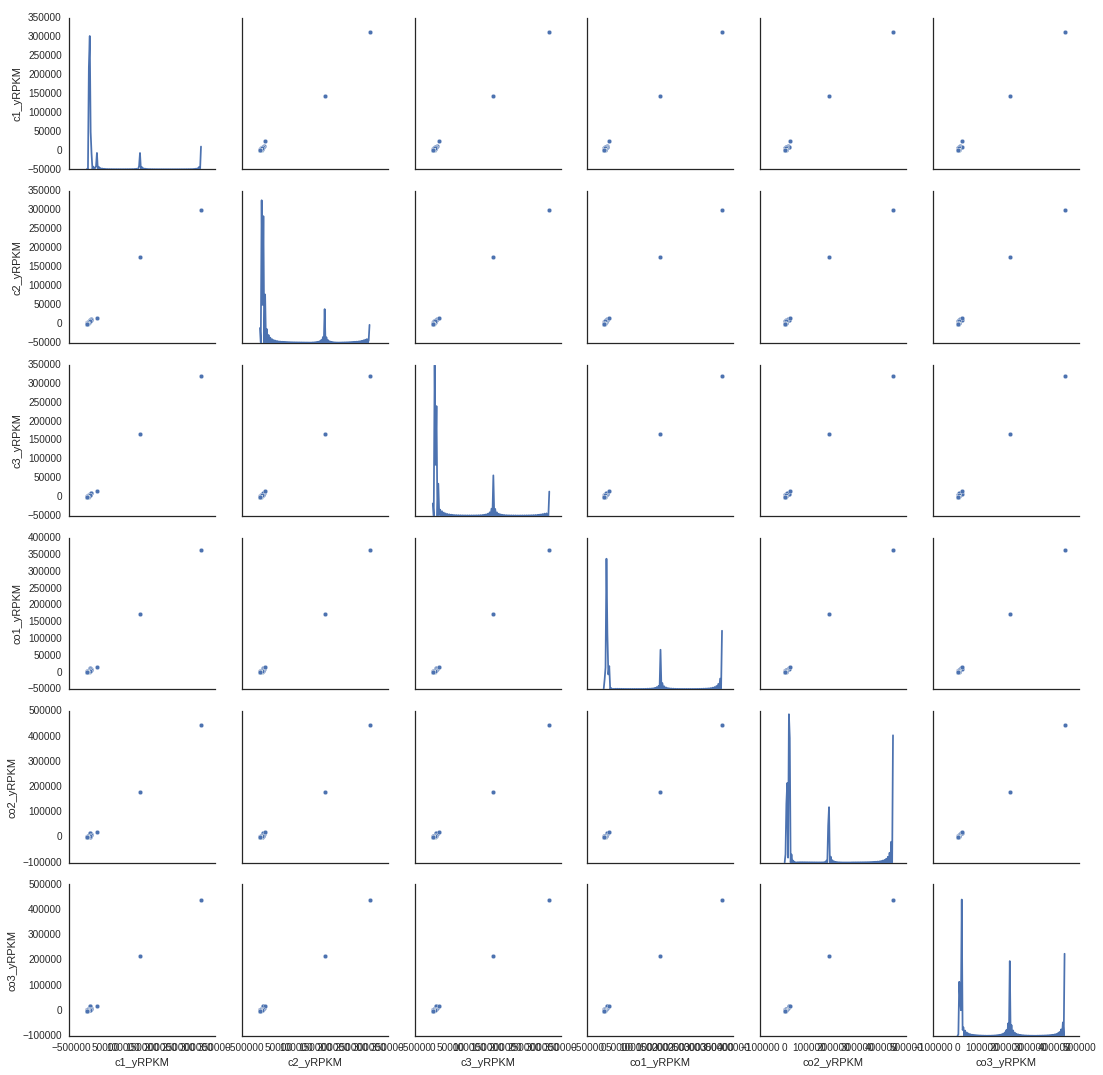

In [45]:
import seaborn as sns
sns.set_context('poster', font_scale=2)
sns.set(style="white")
sns.pairplot(rpkm_ally, diag_kind='kde')
plt.savefig('./pairplot_yeast.png', bbox_inches='tight')

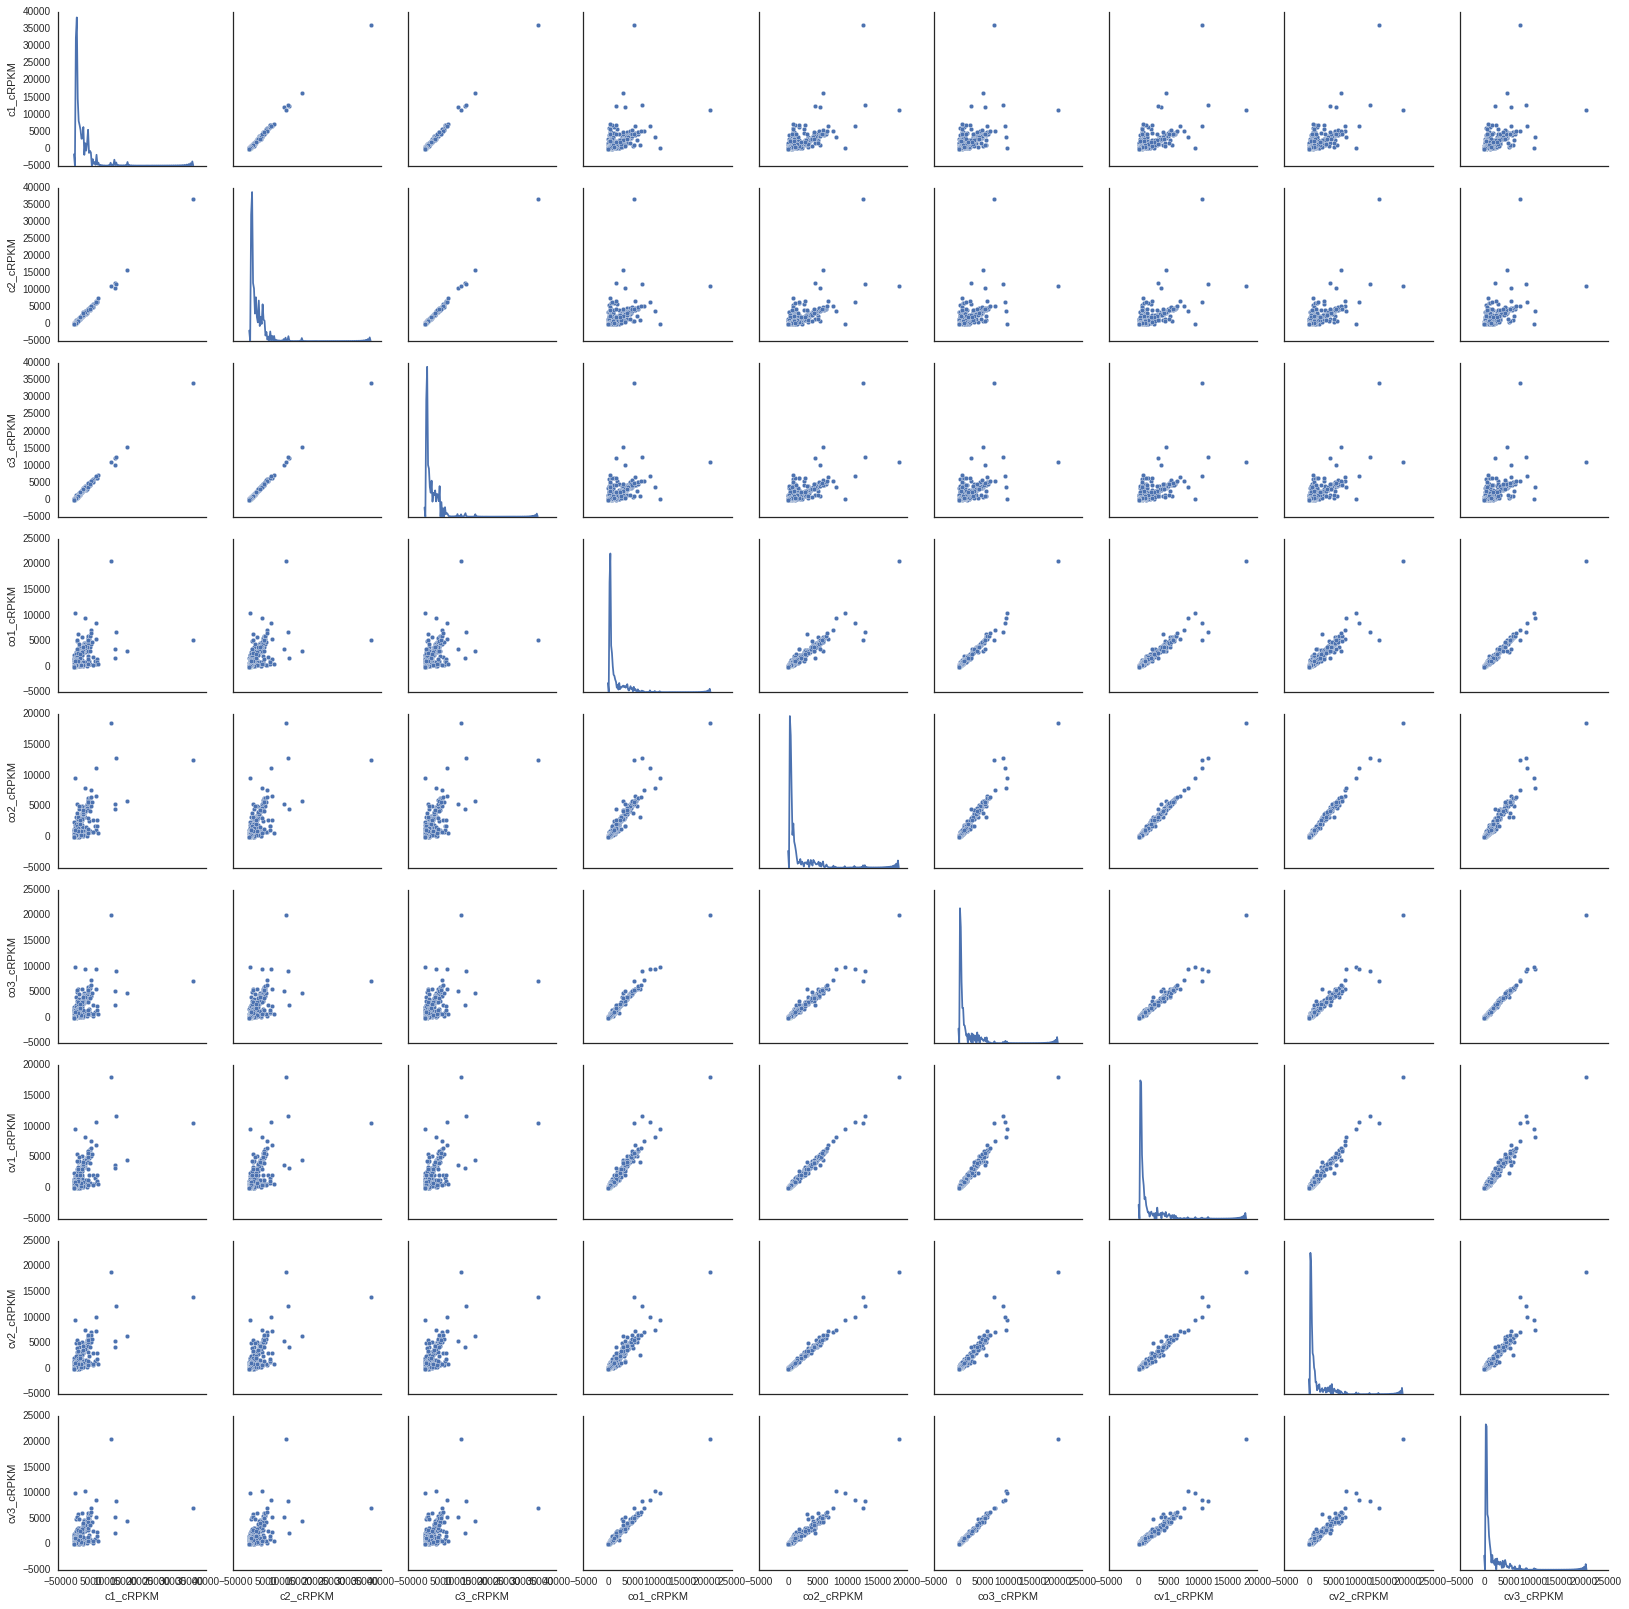

In [46]:
import seaborn as sns
sns.set_context('poster', font_scale=2)
sns.set(style="white")
sns.pairplot(rpkm_allc, diag_kind='kde')
plt.savefig('./pairplot_chlorella.png', bbox_inches='tight')

# write FPKM data into tables

In [27]:
rpkm_allc.to_csv('/home/m/Documents/Cristal/RNA-seq_real/feature_counts/rpkm_values_of_chlorella.txt', sep='\t')

In [28]:
rpkm_ally.to_csv('/home/m/Documents/Cristal/RNA-seq_real/feature_counts/rpkm_values_of_yeast.txt', sep='\t')